In [1]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt
import random
from pathlib import Path

In [2]:
def get_color(h, s=0, l=100):
    def color_func(word, font_size, position, orientation, random_state=None,
                   **kwargs):
        return f'hsl({h}, {s}%%, {random.randint(60, 100)}%%)'
    return color_func

In [3]:
# get current work directory
d = Path.cwd()
# get data directory
data_dir = d.parent / 'data'
# get mask directory
mask_dir = d.parent / 'mask'
# get output directory%macro
out_dir = d.parent / 'out'
# get fon directory
font_dir = d.parent / 'font'

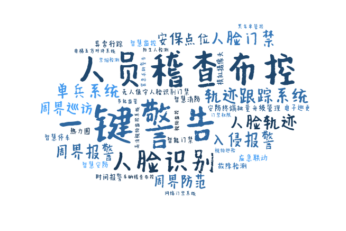

In [5]:
f_name = 'intelligent_SAP'
# 设置字体 用于显示中文
font = font_dir / 'hyxdlb.ttf'
# get file name
file_name = data_dir / f'{f_name}.txt'
# background img
mask = np.array(Image.open(mask_dir / 'cloud_2.png'))
# 读取文件
with open(file_name, 'r', encoding='UTF-8') as f:
    data = f.read()
    # 生成词云
    wc = WordCloud(collocations=False, font_path=str(font), mask=mask,
                   width=800, height=600, margin=2,
                   background_color='white').generate(data)
    wc.recolor(color_func=get_single_color_func('#234f7a'))
    # 显示词云
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # 存储词云到文件
    wc.to_file(out_dir / f'{f_name}.png')